<a href="https://colab.research.google.com/github/dmburns1729/Project-2/blob/main/Assignment_Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Project 2 - Part 2

---



In [243]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from imblearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, f1_score, accuracy_score, classification_report)

from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
smote = SMOTE()

In [107]:
df = pd.read_csv('/content/Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [108]:
df_clean=df.copy()

In [109]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [110]:
df_clean.duplicated().sum()

0

In [111]:
#Drop unneeded ID column
df_clean = df_clean.drop(columns = 'ID')


In [112]:
df_clean.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [113]:
df_clean['CREDIT_SCORE'].value_counts()

0.629027    1
0.618094    1
0.396540    1
0.578306    1
0.633275    1
           ..
0.309272    1
0.847325    1
0.432080    1
0.527041    1
0.435225    1
Name: CREDIT_SCORE, Length: 9018, dtype: int64

In [114]:
df_clean['ANNUAL_MILEAGE'].value_counts()

11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64

In [115]:
# Check categorical columns for consistancy
# select only object columns
categoricals = df_clean.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64 

GENDER
female    5010
male      4990
Name: GENDER, dtype: int64 

RACE
majority    9012
minority     988
Name: RACE, dtype: int64 

DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64 

EDUCATION
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64 

INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64 

VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64 

VEHICLE_TYPE
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64 



In [116]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

age_ordinal = {'16-25':'0', '26-39':'1','40-64':'2','65+':'3' }
df_clean['AGE'] = df_clean['AGE'].replace(age_ordinal)
df_clean['AGE'].value_counts()

1    3063
2    2931
0    2016
3    1990
Name: AGE, dtype: int64

In [117]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

gender_ordinal = {'male':'0', 'female':'1' }
df_clean['GENDER'] = df_clean['GENDER'].replace(gender_ordinal)
df_clean['GENDER'].value_counts()

1    5010
0    4990
Name: GENDER, dtype: int64

In [118]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

race_ordinal = {'majority':'0', 'minority':'1' }
df_clean['RACE'] = df_clean['RACE'].replace(race_ordinal)
df_clean['RACE'].value_counts()

0    9012
1     988
Name: RACE, dtype: int64

In [119]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

experience_ordinal = {'0-9y':'0', '10-19y':'1' , '20-29y':'2', '30y+':'3'}
df_clean['DRIVING_EXPERIENCE'] = df_clean['DRIVING_EXPERIENCE'].replace(experience_ordinal)
df_clean['DRIVING_EXPERIENCE'].value_counts()




0    3530
1    3299
2    2119
3    1052
Name: DRIVING_EXPERIENCE, dtype: int64

In [120]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

# I am going to assume 'none' means no eduction not 'missing value'

education_ordinal = {'none':'0', 'high school':'1' , 'university':'2'}
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace(education_ordinal)
df_clean['EDUCATION'].value_counts()


#EDUCATION
#high school    4157
#university     3928
#none           1915
#ame: EDUCATION, dtype: int64 



1    4157
2    3928
0    1915
Name: EDUCATION, dtype: int64

In [121]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

income_ordinal = {'poverty':'0', 'working class':'1' , 'middle class':'2', 'upper class':'3'}
df_clean['INCOME'] = df_clean['INCOME'].replace(income_ordinal)
df_clean['INCOME'].value_counts()


3    4336
2    2138
0    1814
1    1712
Name: INCOME, dtype: int64

In [122]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

vehicle_year_ordinal = {'before 2015':'0', 'after 2015':'1'}
df_clean['VEHICLE_YEAR'] = df_clean['VEHICLE_YEAR'].replace(vehicle_year_ordinal)
df_clean['VEHICLE_YEAR'].value_counts()

0    6967
1    3033
Name: VEHICLE_YEAR, dtype: int64

In [123]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

vehicle_type_ordinal = {'sedan':'0', 'sports car':'1'}
df_clean['VEHICLE_TYPE'] = df_clean['VEHICLE_TYPE'].replace(vehicle_type_ordinal)
df_clean['VEHICLE_TYPE'].value_counts()

0    9523
1     477
Name: VEHICLE_TYPE, dtype: int64

In [124]:
df_clean['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [125]:
df_clean['MARRIED'].value_counts()

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

In [126]:
df_clean['CHILDREN'].value_counts()

1.0    6888
0.0    3112
Name: CHILDREN, dtype: int64

In [127]:
df_clean['ANNUAL_MILEAGE'].value_counts()

 

11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64

In [128]:
df_clean['OUTCOME'].value_counts()


0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [ ]:
# Inbalanced data!  May need to address

In [129]:
df_clean['AGE'] = df_clean['AGE'].astype('int64')
df_clean['GENDER'] = df_clean['GENDER'].astype('int64')
df_clean['RACE'] = df_clean['RACE'].astype('int64')
df_clean['DRIVING_EXPERIENCE'] = df_clean['DRIVING_EXPERIENCE'].astype('int64')
df_clean['EDUCATION'] = df_clean['EDUCATION'].astype('int64')
df_clean['INCOME'] = df_clean['INCOME'].astype('int64')
df_clean['VEHICLE_YEAR'] = df_clean['VEHICLE_YEAR'].astype('int64')
df_clean['VEHICLE_TYPE'] = df_clean['VEHICLE_TYPE'].astype('int64')
df_clean['VEHICLE_OWNERSHIP'] = df_clean['VEHICLE_OWNERSHIP'].astype('int64')
df_clean['MARRIED'] = df_clean['VEHICLE_OWNERSHIP'].astype('int64')
df_clean['CHILDREN'] = df_clean['CHILDREN'].astype('int64')
df_clean['OUTCOME'] = df_clean['OUTCOME'].astype('int64')

df_clean['POSTAL_CODE'] = df_clean['POSTAL_CODE'].astype('object')


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  object 
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [130]:
df_clean

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,0,0,1,3,0.629027,1,1,1,1,10238,12000.0,0,0,0,0,0
1,0,0,0,0,0,0,0.357757,0,0,0,0,10238,16000.0,0,0,0,0,1
2,0,1,0,0,1,1,0.493146,1,0,1,0,10238,11000.0,0,0,0,0,0
3,0,0,0,0,2,1,0.206013,1,0,1,1,32765,11000.0,0,0,0,0,0
4,1,0,0,1,0,1,0.388366,1,0,1,0,32765,12000.0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,2,3,0.582787,1,0,1,0,10238,16000.0,0,0,0,1,0
9996,1,1,0,1,0,2,0.522231,1,1,1,1,32765,NaN,0,1,0,0,0
9997,1,0,0,0,1,2,0.470940,1,0,1,1,10238,14000.0,0,0,0,0,0
9998,1,1,0,1,1,0,0.364185,0,0,0,1,10238,13000.0,0,2,0,1,1


In [131]:
df_clean.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.489500,0.501000,0.098800,1.069300,1.20130,1.899600,0.515813,0.697000,0.303300,0.697000,0.688800,11697.003207,0.047700,1.482900,0.23920,1.056300,0.313300
std,1.025278,0.500024,0.298408,0.990452,0.73745,1.149109,0.137688,0.459578,0.459707,0.459578,0.463008,2818.434528,0.213141,2.241966,0.55499,1.652454,0.463858
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.053358,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.417191,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.00000,2.000000,0.525033,1.000000,0.000000,1.000000,1.000000,12000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,2.000000,2.00000,3.000000,0.618312,1.000000,1.000000,1.000000,1.000000,14000.000000,0.000000,2.000000,0.00000,2.000000,1.000000
max,3.000000,1.000000,1.000000,3.000000,2.00000,3.000000,0.960819,1.000000,1.000000,1.000000,1.000000,22000.000000,1.000000,22.000000,6.00000,15.000000,1.000000


In [132]:
df_clean['SPEEDING_VIOLATIONS'].value_counts()

0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64

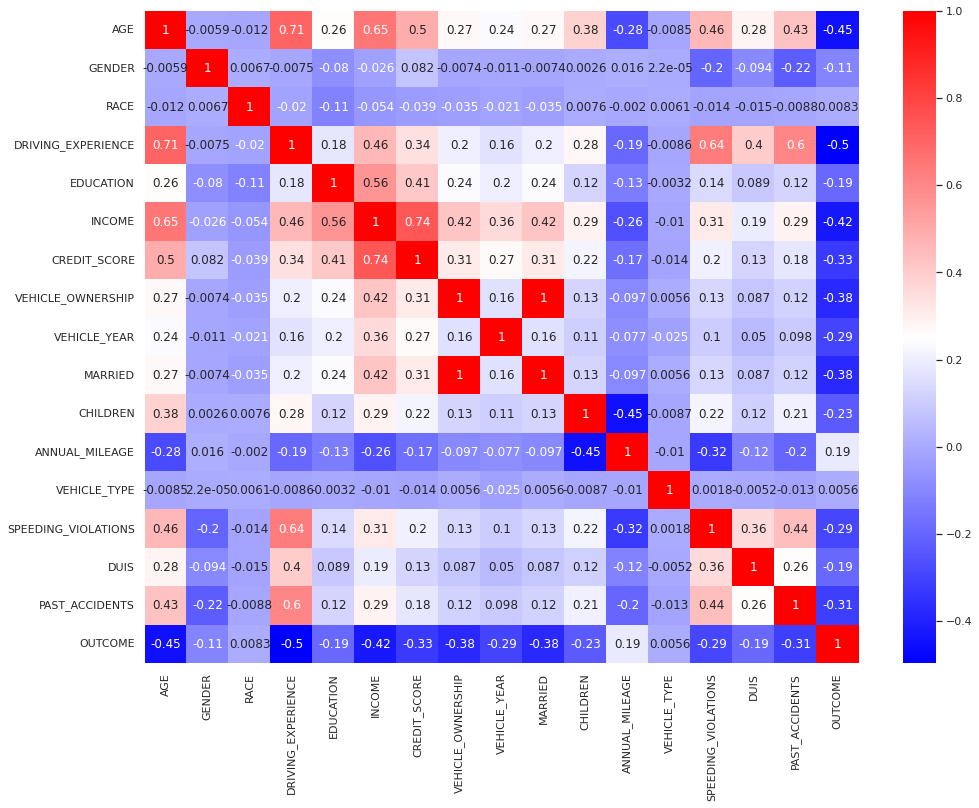

In [133]:
corr = df_clean.corr()
plt.figure(figsize = (16,12));
sns.heatmap(corr, cmap = 'bwr', annot = True);

In [134]:
# I will drop the data with the little correlaton with 'Outcome'

df_clean = df_clean.drop(['RACE','VEHICLE_TYPE', 'GENDER'], axis = 1)

# CREDIT_SCORE is highly correlated with income. There are also missing values for CREDIT_SCORE which may 
# mess up the results if we impute it.  Judgement call, but I am going to drop it.

# Annual mileage has strong correlations with a number of factors and also has missing values which may
# mess up the classification if we impute it. Judgement call, but I am going to drop it.

In [135]:
df_clean

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,1,3,0.629027,1,1,1,1,10238,12000.0,0,0,0,0
1,0,0,0,0,0.357757,0,0,0,0,10238,16000.0,0,0,0,1
2,0,0,1,1,0.493146,1,0,1,0,10238,11000.0,0,0,0,0
3,0,0,2,1,0.206013,1,0,1,1,32765,11000.0,0,0,0,0
4,1,1,0,1,0.388366,1,0,1,0,32765,12000.0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,2,3,0.582787,1,0,1,0,10238,16000.0,0,0,1,0
9996,1,1,0,2,0.522231,1,1,1,1,32765,NaN,1,0,0,0
9997,1,0,1,2,0.470940,1,0,1,1,10238,14000.0,0,0,0,0
9998,1,1,1,0,0.364185,0,0,0,1,10238,13000.0,2,0,1,1


In [136]:
df_clean.isna().sum()

AGE                      0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   DRIVING_EXPERIENCE   10000 non-null  int64  
 2   EDUCATION            10000 non-null  int64  
 3   INCOME               10000 non-null  int64  
 4   CREDIT_SCORE         9018 non-null   float64
 5   VEHICLE_OWNERSHIP    10000 non-null  int64  
 6   VEHICLE_YEAR         10000 non-null  int64  
 7   MARRIED              10000 non-null  int64  
 8   CHILDREN             10000 non-null  int64  
 9   POSTAL_CODE          10000 non-null  object 
 10  ANNUAL_MILEAGE       9043 non-null   float64
 11  SPEEDING_VIOLATIONS  10000 non-null  int64  
 12  DUIS                 10000 non-null  int64  
 13  PAST_ACCIDENTS       10000 non-null  int64  
 14  OUTCOME              10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
m

In [138]:
df_viz=df_clean.copy()

In [139]:
# I would probably drop the rows with missing data but the instructions say not to
# So, I am going to do a sort of crappy fillna to visualize


mean_length = df_viz['CREDIT_SCORE'].mean()
df_viz['CREDIT_SCORE'].fillna(value = mean_length, inplace = True)

mean_height = df_viz['ANNUAL_MILEAGE'].mean()
df_viz['ANNUAL_MILEAGE'].fillna(value = mean_height, inplace = True) 




In [140]:
df_viz.isna().sum()

AGE                    0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [141]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   DRIVING_EXPERIENCE   10000 non-null  int64  
 2   EDUCATION            10000 non-null  int64  
 3   INCOME               10000 non-null  int64  
 4   CREDIT_SCORE         10000 non-null  float64
 5   VEHICLE_OWNERSHIP    10000 non-null  int64  
 6   VEHICLE_YEAR         10000 non-null  int64  
 7   MARRIED              10000 non-null  int64  
 8   CHILDREN             10000 non-null  int64  
 9   POSTAL_CODE          10000 non-null  object 
 10  ANNUAL_MILEAGE       10000 non-null  float64
 11  SPEEDING_VIOLATIONS  10000 non-null  int64  
 12  DUIS                 10000 non-null  int64  
 13  PAST_ACCIDENTS       10000 non-null  int64  
 14  OUTCOME              10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
m

In [142]:
df_viz

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,1,3,0.629027,1,1,1,1,10238,12000.000000,0,0,0,0
1,0,0,0,0,0.357757,0,0,0,0,10238,16000.000000,0,0,0,1
2,0,0,1,1,0.493146,1,0,1,0,10238,11000.000000,0,0,0,0
3,0,0,2,1,0.206013,1,0,1,1,32765,11000.000000,0,0,0,0
4,1,1,0,1,0.388366,1,0,1,0,32765,12000.000000,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,2,3,0.582787,1,0,1,0,10238,16000.000000,0,0,1,0
9996,1,1,0,2,0.522231,1,1,1,1,32765,11697.003207,1,0,0,0
9997,1,0,1,2,0.470940,1,0,1,1,10238,14000.000000,0,0,0,0
9998,1,1,1,0,0.364185,0,0,0,1,10238,13000.000000,2,0,1,1


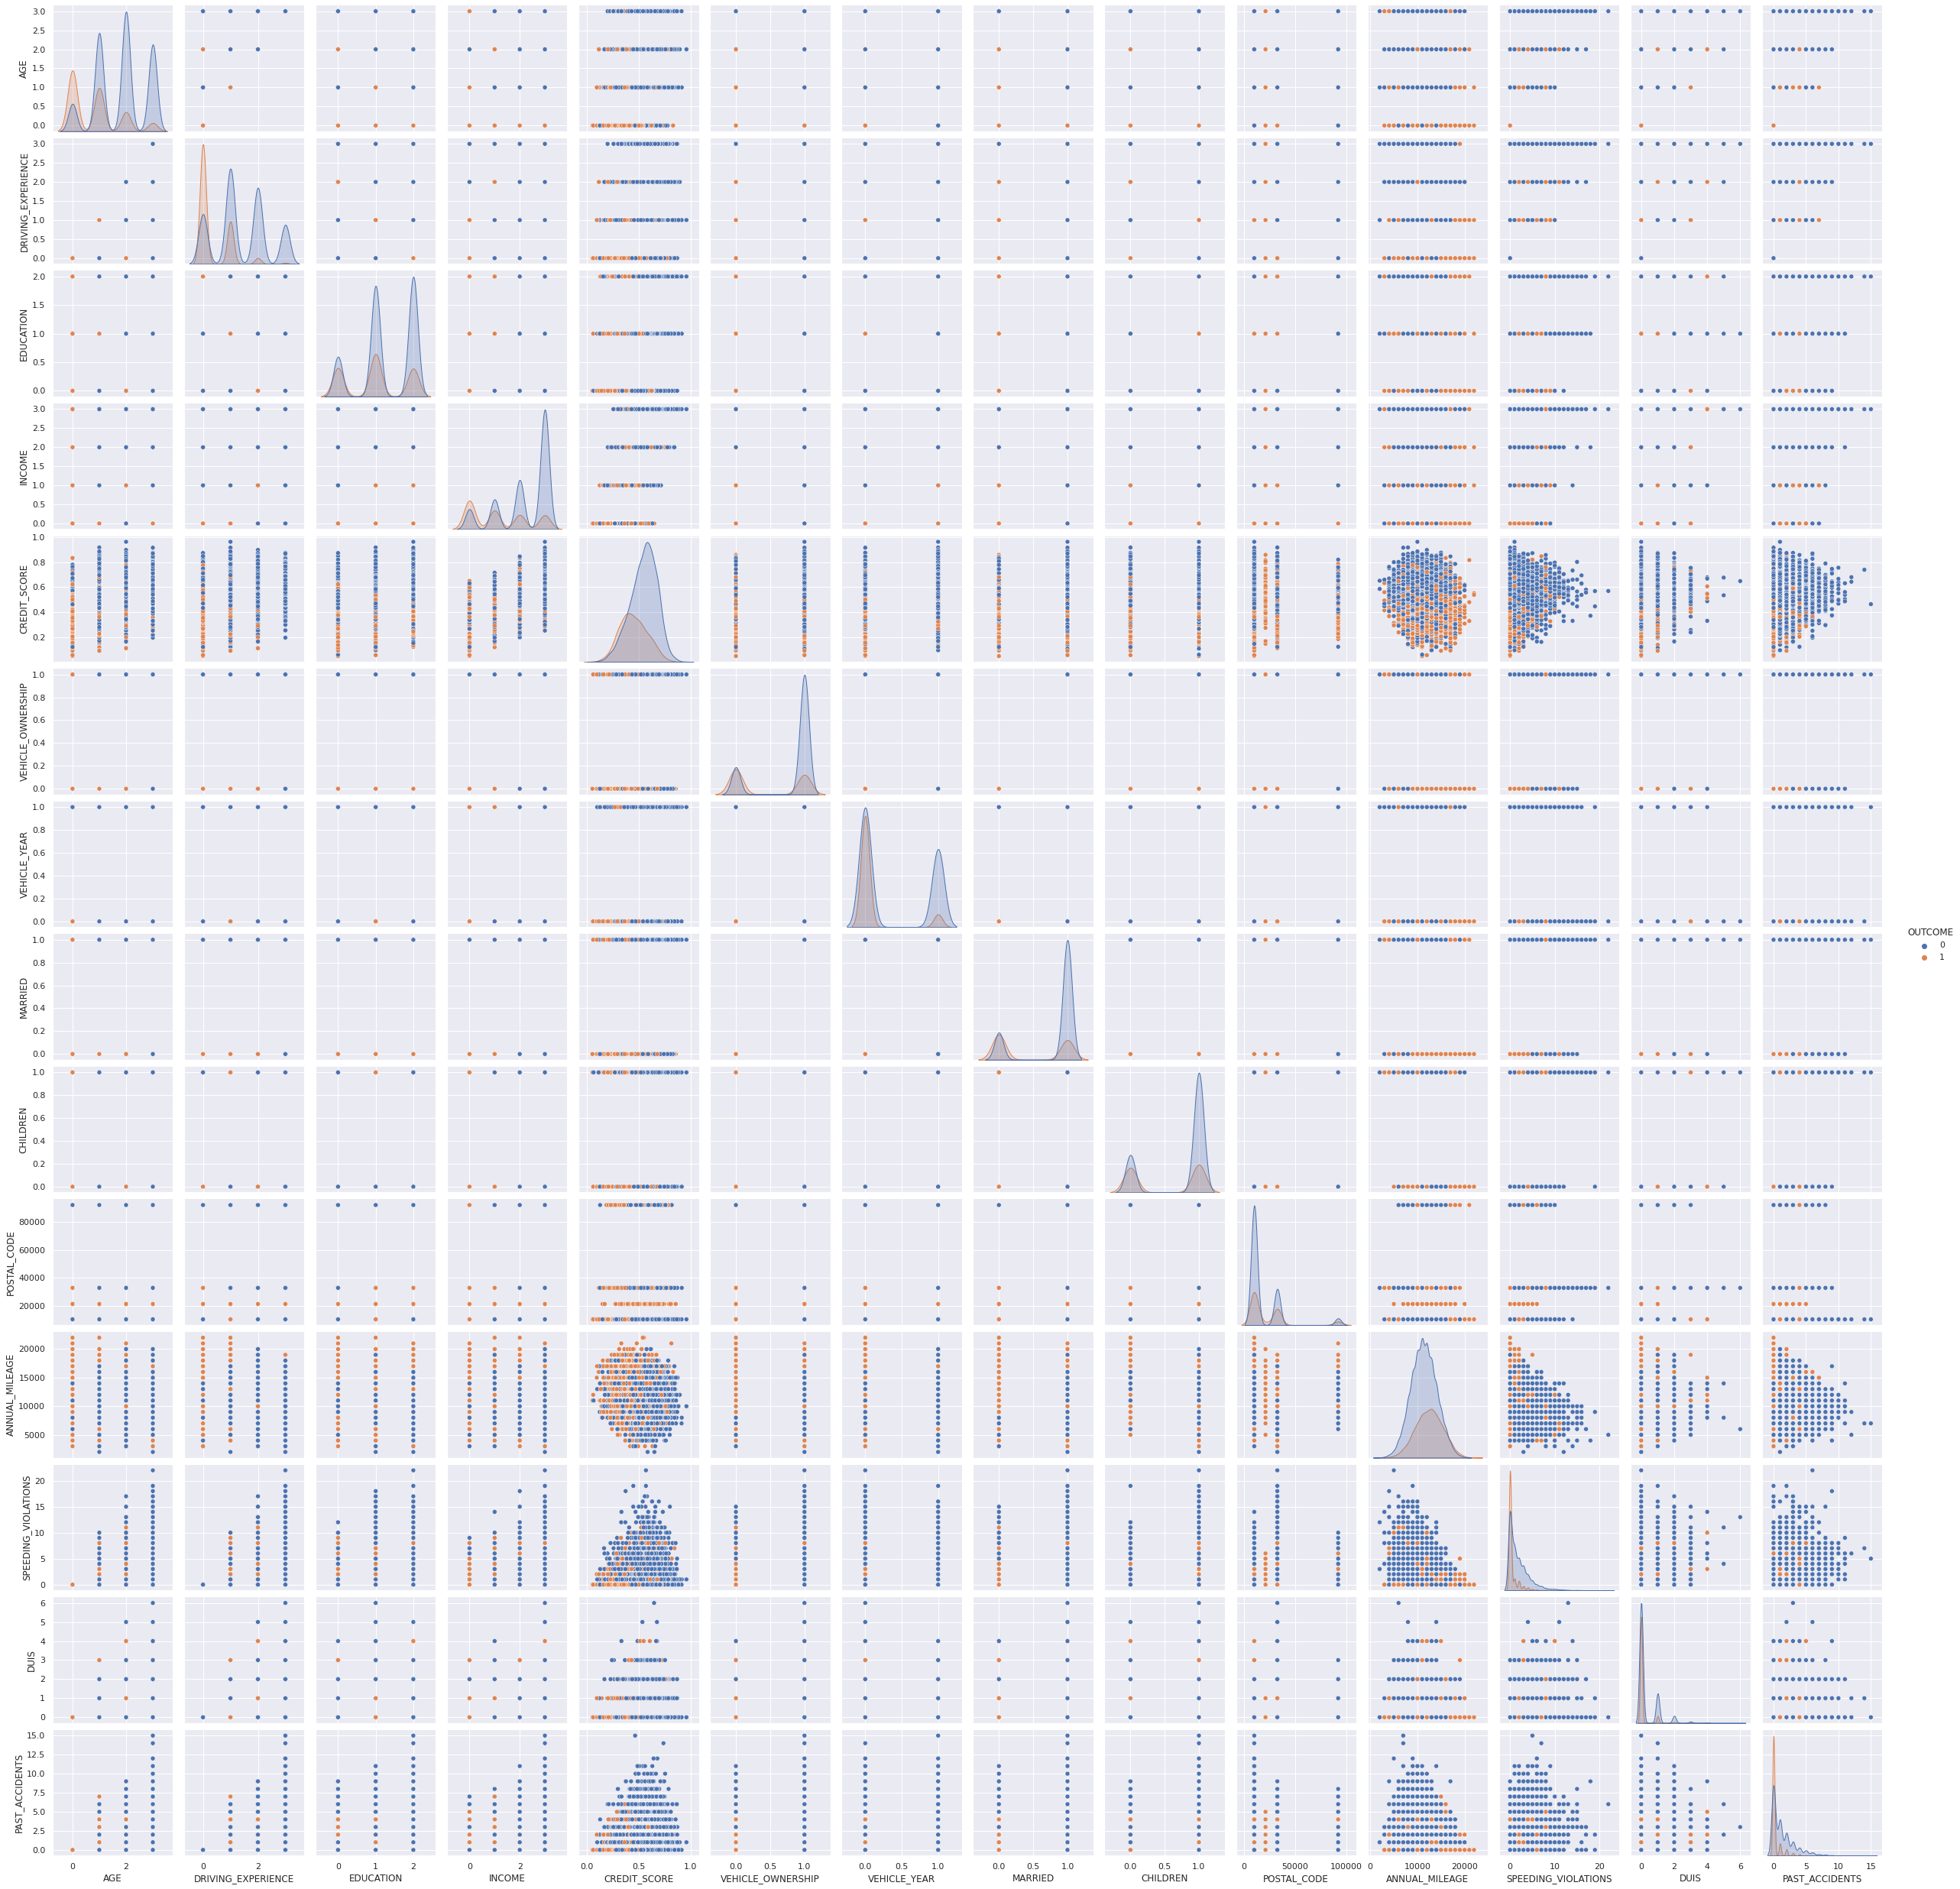

In [145]:
sns.pairplot(df_clean, hue = "OUTCOME");

# Please note that the diagonal is a univariate plot for each data set.
 

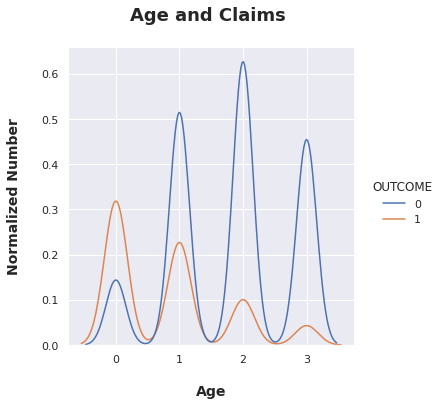

In [146]:
sns.displot(df_clean, x="AGE", hue = 'OUTCOME',kind="kde");
sns.set(style="darkgrid")

# Title and labels
plt.title('Age and Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nAge', fontsize = 14, weight='bold');
plt.ylabel('Normalized Number\n', fontsize = 14, weight='bold');

In [148]:
# Outcome 0 means no claim and 1 means the driver filed a claim
# You can see that as the driver ages, number of claims falls

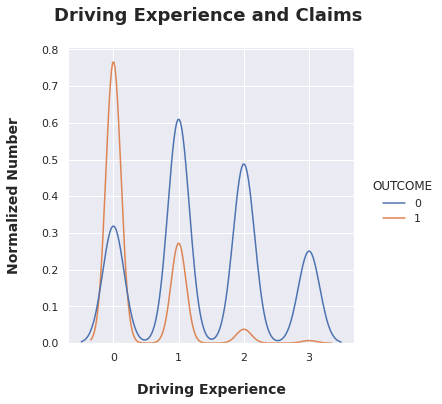

In [149]:
sns.displot(df_clean, x="DRIVING_EXPERIENCE", hue = 'OUTCOME',kind="kde");
sns.set(style="darkgrid")

# Title and labels
plt.title('Driving Experience and Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nDriving Experience', fontsize = 14, weight='bold');
plt.ylabel('Normalized Number\n', fontsize = 14, weight='bold');

In [150]:
# This plot is very similar to the one above.  The more experience a drive has the fewer the claims
# This would argue that we could drop one of these data sets

# From here down is not a part of the assignment

In [151]:
df_ml = df_clean.copy()

In [152]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   DRIVING_EXPERIENCE   10000 non-null  int64  
 2   EDUCATION            10000 non-null  int64  
 3   INCOME               10000 non-null  int64  
 4   CREDIT_SCORE         9018 non-null   float64
 5   VEHICLE_OWNERSHIP    10000 non-null  int64  
 6   VEHICLE_YEAR         10000 non-null  int64  
 7   MARRIED              10000 non-null  int64  
 8   CHILDREN             10000 non-null  int64  
 9   POSTAL_CODE          10000 non-null  object 
 10  ANNUAL_MILEAGE       9043 non-null   float64
 11  SPEEDING_VIOLATIONS  10000 non-null  int64  
 12  DUIS                 10000 non-null  int64  
 13  PAST_ACCIDENTS       10000 non-null  int64  
 14  OUTCOME              10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
m

In [153]:
#df_ml = df_ml.drop(columns = 'ID')
# CREDIT_SCORE and ANNUAL_MILEAGE

In [154]:
df_ml

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,1,3,0.629027,1,1,1,1,10238,12000.0,0,0,0,0
1,0,0,0,0,0.357757,0,0,0,0,10238,16000.0,0,0,0,1
2,0,0,1,1,0.493146,1,0,1,0,10238,11000.0,0,0,0,0
3,0,0,2,1,0.206013,1,0,1,1,32765,11000.0,0,0,0,0
4,1,1,0,1,0.388366,1,0,1,0,32765,12000.0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,2,3,0.582787,1,0,1,0,10238,16000.0,0,0,1,0
9996,1,1,0,2,0.522231,1,1,1,1,32765,NaN,1,0,0,0
9997,1,0,1,2,0.470940,1,0,1,1,10238,14000.0,0,0,0,0
9998,1,1,1,0,0.364185,0,0,0,1,10238,13000.0,2,0,1,1


In [155]:
# split X and y, you are predicting weight
X = df_ml.drop(columns=['OUTCOME'])
y = df_ml['OUTCOME']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
                                                    

In [156]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop') 

# Fit the column transformer on the X_train
preprocessor.fit(X_train)

# Transform the X_train and the X_test

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_transformed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_transformed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_transformed.dtype)
print('All data in X_test_processed are', X_test_transformed.dtype)
print('\n')
print('shape of data is', X_train_transformed.shape)
print('\n')
X_train_transformed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7500, 17)




array([[ 0.49446627, -1.07702775, -0.27881945, ...,  0.        ,
         0.        ,  1.        ],
       [-1.45122996, -1.07702775, -1.63143642, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49446627, -0.07271243,  1.07379753, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.46731438,  1.93591821,  1.07379753, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49446627,  0.93160289,  1.07379753, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45122996, -1.07702775, -0.27881945, ...,  0.        ,
         0.        ,  0.        ]])

In [163]:
# define the evaluate_classiffication function here.  I shameless ripped this idea 
# off from the code along notebook.  

def evaluate_classiffication(lgr_pipe, X_test, y_test, label="Test Data"):
  test_preds = lgr_pipe.predict(X_test)



   ## Print classification report for the test data 
  print('---'*20)
  print(f"CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))
  plt.grid(False)

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      5144
           1       0.77      0.71      0.74      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.81      0.81      7500
weighted avg       0.84      0.84      0.84      7500



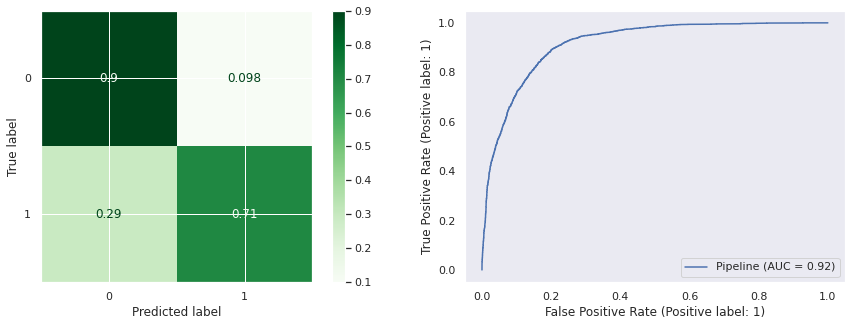

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1723
           1       0.77      0.69      0.73       777

    accuracy                           0.84      2500
   macro avg       0.82      0.80      0.81      2500
weighted avg       0.84      0.84      0.84      2500



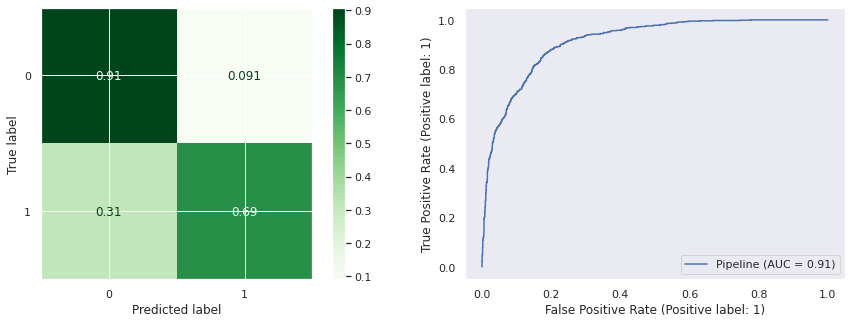

In [166]:
%%time

# Logistic Regression

log_reg = LogisticRegression()
log_reg_pipe = make_pipeline(preprocessor, log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

In [172]:
#RandomOverSampler
smote = SMOTE()

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1723
           1       0.68      0.86      0.76       777

    accuracy                           0.83      2500
   macro avg       0.80      0.84      0.81      2500
weighted avg       0.85      0.83      0.84      2500



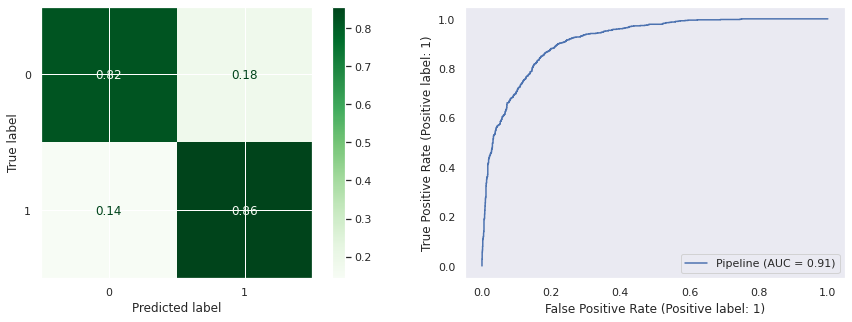

In [174]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg_pipe = make_pipeline(preprocessor, smote, log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1723
           1       0.68      0.87      0.76       777

    accuracy                           0.83      2500
   macro avg       0.80      0.84      0.81      2500
weighted avg       0.85      0.83      0.83      2500



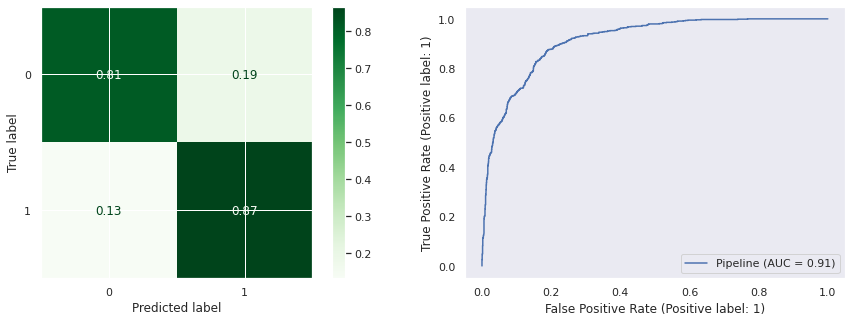

In [196]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg_pipe = make_pipeline(preprocessor, RandomOverSampler(), log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

{0.01: 0.816,
 0.1: 0.8284,
 1: 0.8324,
 10: 0.8296,
 100: 0.8328,
 1000: 0.8312,
 10000: 0.8288}

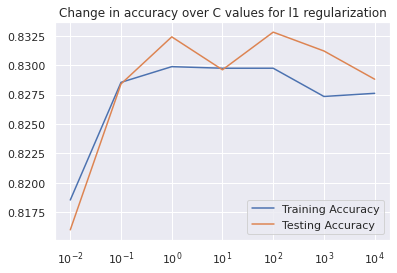

In [200]:
# We will start tuning L1 first

# create a list of c values and empty lists for scores
c_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg_tune1 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_tune1_pipe = make_pipeline(preprocessor, RandomOverSampler(), log_reg_tune1)
  log_reg_tune1_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_tune1_pipe.score(X_train, y_train))
  test_scores.append(log_reg_tune1_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.7572,
 0.001: 0.7968,
 0.01: 0.8176,
 0.1: 0.8264,
 1: 0.8324,
 10: 0.8304,
 100: 0.8308,
 1000: 0.8296}

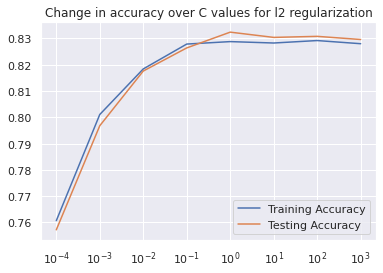

In [203]:
# Tune L2

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg_tune2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_tune2_pipe = make_pipeline(preprocessor, RandomOverSampler(), log_reg_tune2)
  log_reg_tune2_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_tune2_pipe.score(X_train, y_train))
  test_scores.append(log_reg_tune2_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Original Log Reg Untuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1723
           1       0.68      0.87      0.76       777

    accuracy                           0.83      2500
   macro avg       0.80      0.84      0.81      2500
weighted avg       0.85      0.83      0.83      2500



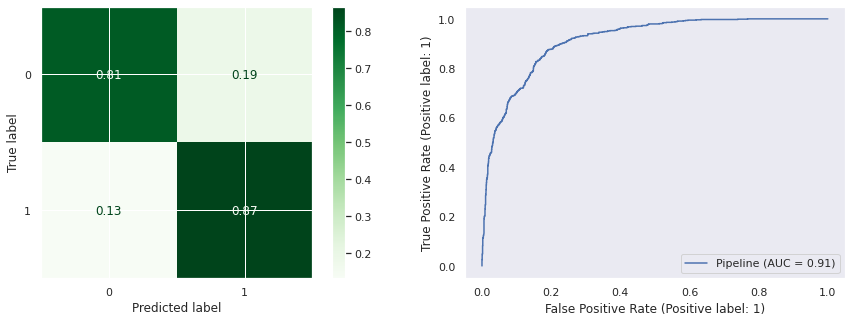

Best Log Reg Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1723
           1       0.68      0.87      0.76       777

    accuracy                           0.83      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.83      0.84      2500



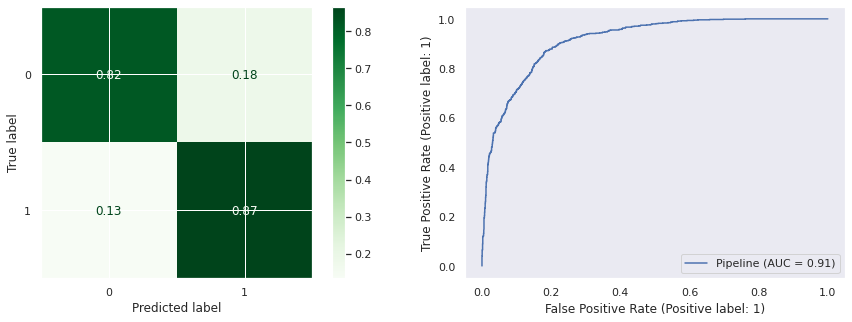

In [205]:
%%time
log_reg_best = LogisticRegression(C=100, max_iter=1000, solver='liblinear', penalty='l1')
log_reg_best_pipe = make_pipeline(preprocessor, smote, log_reg_best)
log_reg_best_pipe.fit(X_train, y_train)
print("Original Log Reg Untuned")
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")
print("Best Log Reg Tuned")
evaluate_classiffication(log_reg_best_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5144
           1       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



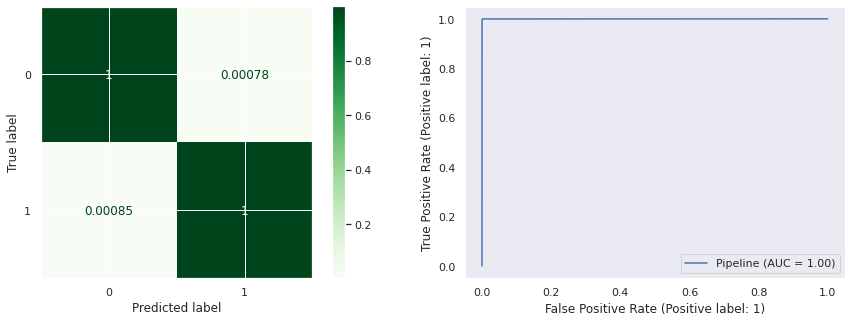

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1723
           1       0.74      0.68      0.71       777

    accuracy                           0.83      2500
   macro avg       0.80      0.78      0.79      2500
weighted avg       0.82      0.83      0.82      2500



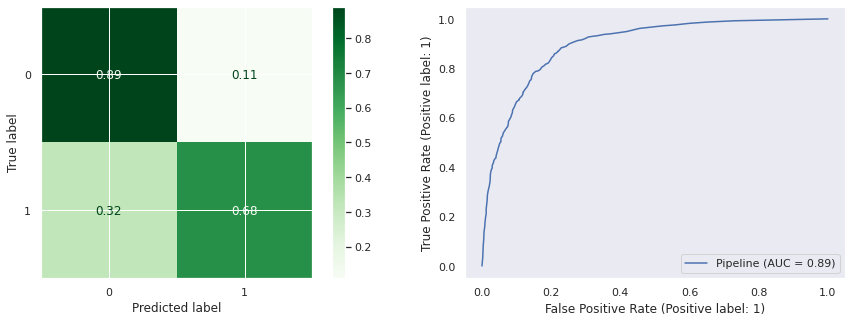

In [206]:
%%time
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1723
           1       0.72      0.71      0.71       777

    accuracy                           0.82      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.82      0.82      0.82      2500



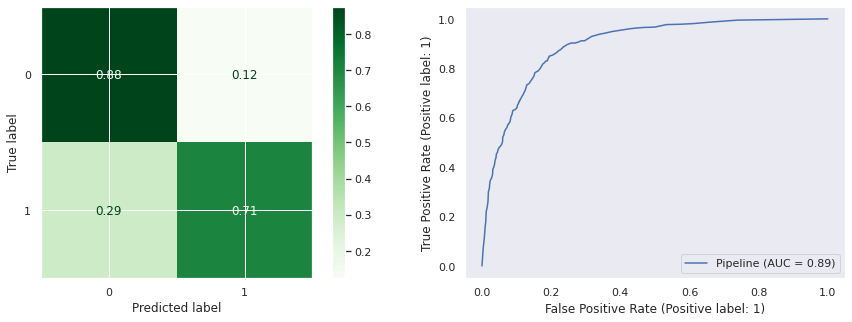

In [207]:
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, smote, rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1723
           1       0.71      0.73      0.72       777

    accuracy                           0.83      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.83      0.83      0.83      2500



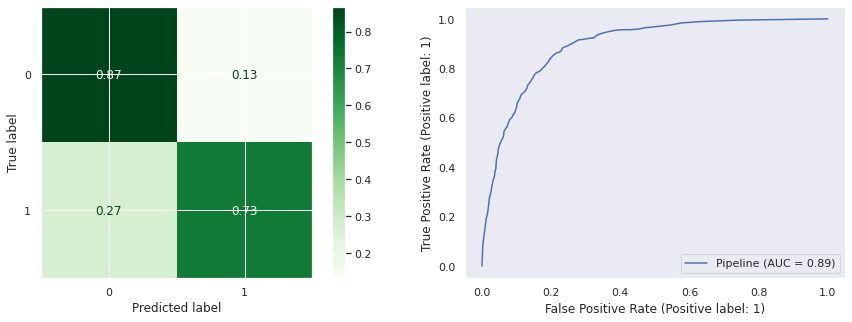

In [208]:
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, RandomOverSampler(), rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

In [215]:
rf_tune = RandomForestClassifier()
rf_tune_pipe = make_pipeline(preprocessor, RandomOverSampler(), rf_tune)

In [ ]:
rf_tune_pipe.get_params()

In [217]:
#create and visualize our parameter grid
param_grid = {'randomforestclassifier__max_depth': [1,10,20,30,40,50],
              'randomforestclassifier__n_estimators': [1,2,3,4,5,10,15,20, 30, 40, 50, 60, 70, 80, 90, 100],
              'randomforestclassifier__min_samples_leaf': [1,2,3],
              'randomforestclassifier__min_samples_split': [1,2,3]
              }

# I ran this a few times and tinkered with the params

In [218]:
model = rf_tune_pipe  
rf_tune_pipe_grid_search = GridSearchCV(model, param_grid)   

In [ ]:
%%time
rf_tune_pipe_grid_search.fit(X_train, y_train)

In [220]:


#retrieve the best version of the model
best_model_rf = rf_tune_pipe_grid_search.best_estimator_

#refit the model on the whole training set
best_model_rf.fit(X_train, y_train)

#score the model on the test set
best_model_rf.score(X_test, y_test)

0.836

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1723
           1       0.69      0.85      0.76       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



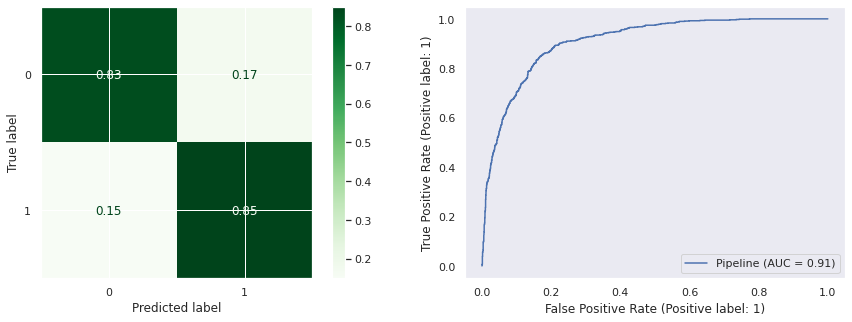

In [221]:
evaluate_classiffication(best_model_rf, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5144
           1       0.80      0.76      0.78      2356

    accuracy                           0.86      7500
   macro avg       0.85      0.83      0.84      7500
weighted avg       0.86      0.86      0.86      7500



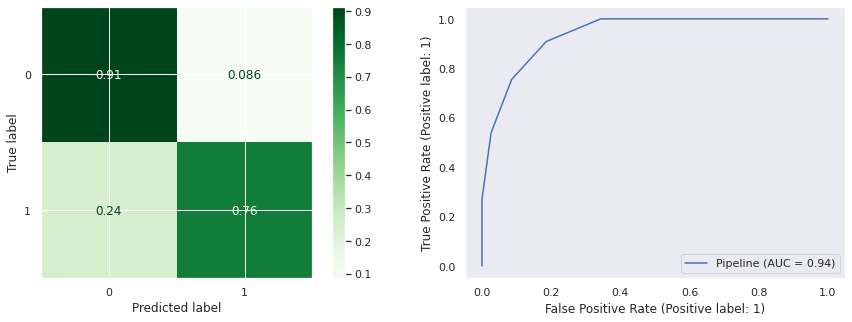

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1723
           1       0.72      0.66      0.69       777

    accuracy                           0.81      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.81      0.81      0.81      2500



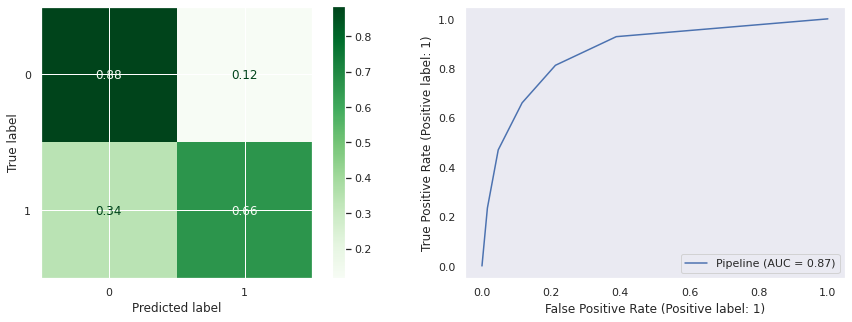

In [168]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)
evaluate_classiffication(knn_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1723
           1       0.64      0.80      0.71       777

    accuracy                           0.80      2500
   macro avg       0.77      0.80      0.78      2500
weighted avg       0.82      0.80      0.81      2500



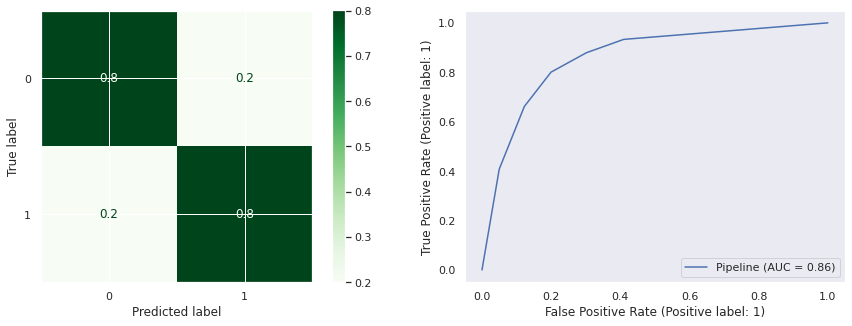

In [232]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, smote, knn)
knn_pipe.fit(X_train, y_train)
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1723
           1       0.64      0.80      0.71       777

    accuracy                           0.80      2500
   macro avg       0.77      0.80      0.78      2500
weighted avg       0.82      0.80      0.80      2500



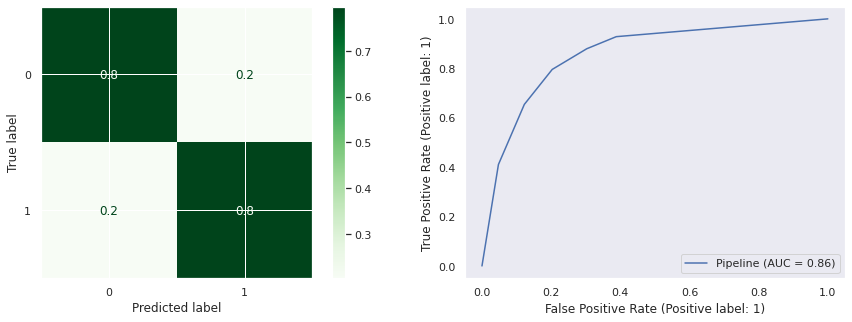

In [231]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, RandomOverSampler(), knn)
knn_pipe.fit(X_train, y_train)
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

In [253]:
%%time

num_neighbors = range(1,20)
scores2 = pd.DataFrame(index=num_neighbors, columns=['Test Score','Train Score'])

for neighbors in num_neighbors:    
   model = KNeighborsClassifier(n_neighbors=neighbors,leaf_size=30, p=2  )
   knn_pipe_tune = make_pipeline(preprocessor, smote, model)
   knn_pipe_tune.fit(X_train, y_train)

   acc_score_train = knn_pipe.score(X_train, y_train)
   acc_score_test = knn_pipe.score(X_test, y_test)


   scores2.loc[neighbors, 'Train Score'] = acc_score_train
   scores2.loc[neighbors, 'Test Score'] = acc_score_test
   scores2.head()


#print("Best KNN Tuned")
#evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")


CPU times: user 51.4 s, sys: 7.23 s, total: 58.6 s
Wall time: 52.4 s


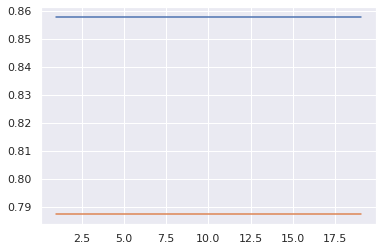

In [225]:
import matplotlib.pyplot as plt


plt.plot(scores2['Train Score']);
plt.plot(scores2['Test Score']);

In [226]:
sorted_scores = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
1,0.7872,0.857867
11,0.7872,0.857867
18,0.7872,0.857867
17,0.7872,0.857867
16,0.7872,0.857867


In [255]:
model = KNeighborsClassifier(n_neighbors=5,leaf_size=30, p=2  )
knn_pipe_best = make_pipeline(preprocessor, smote, model)
knn_pipe_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f315043d8d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f31558e1f50>)])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Original KNN Untuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1723
           1       0.64      0.80      0.71       777

    accuracy                           0.80      2500
   macro avg       0.77      0.80      0.78      2500
weighted avg       0.82      0.80      0.81      2500



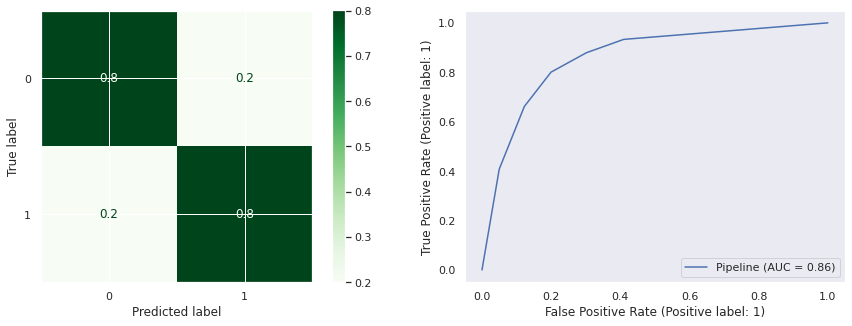

Best KNN Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1723
           1       0.63      0.81      0.71       777

    accuracy                           0.80      2500
   macro avg       0.77      0.80      0.78      2500
weighted avg       0.82      0.80      0.80      2500



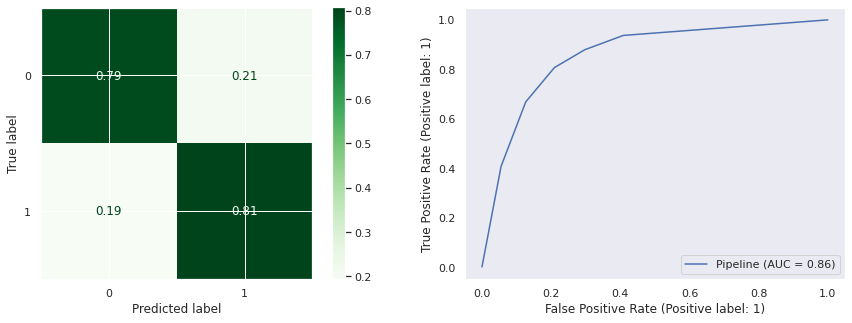

In [256]:
print("Original KNN Untuned")
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")
print("Best KNN Tuned")
evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")

In [233]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [234]:
#Import RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
#Create an oversampling pipeline
over_sampler = RandomOverSampler()

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1723
           1       0.75      0.73      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



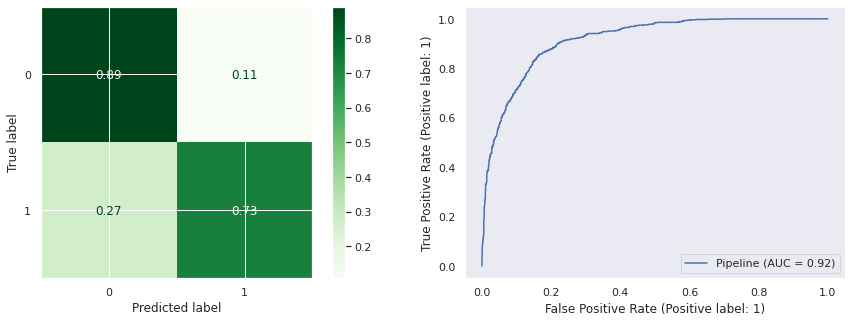

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5144
           1       0.76      0.76      0.76      2356

    accuracy                           0.85      7500
   macro avg       0.82      0.82      0.82      7500
weighted avg       0.85      0.85      0.85      7500



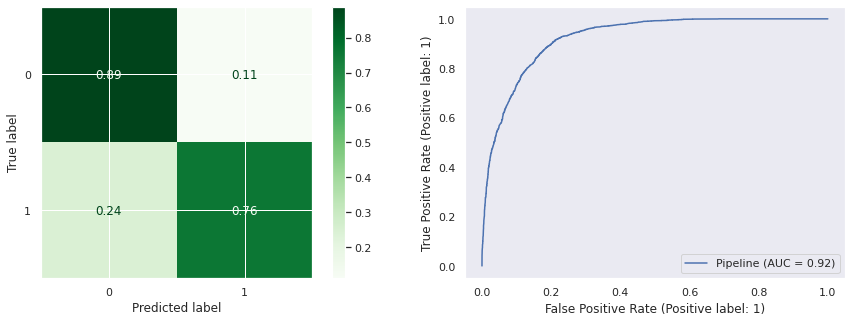

CPU times: user 1.7 s, sys: 50.9 ms, total: 1.75 s
Wall time: 2.45 s


In [235]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe, X_test, y_test, label="Test Data")
evaluate_classiffication(xgb_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1723
           1       0.70      0.84      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



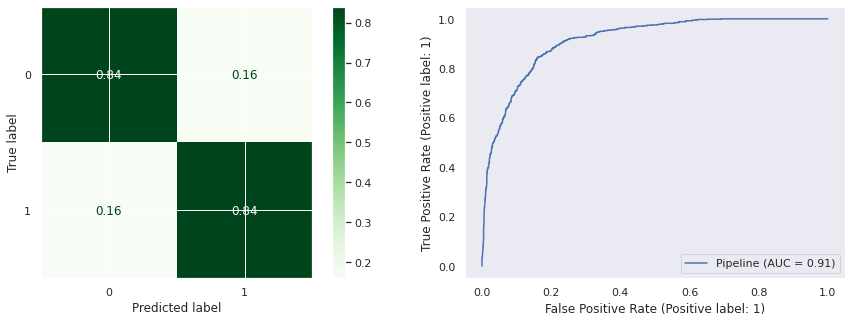

CPU times: user 1.81 s, sys: 85.8 ms, total: 1.9 s
Wall time: 2.05 s


In [236]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, smote, xgb)
xgb_pipe.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1723
           1       0.69      0.86      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.86      0.84      0.84      2500



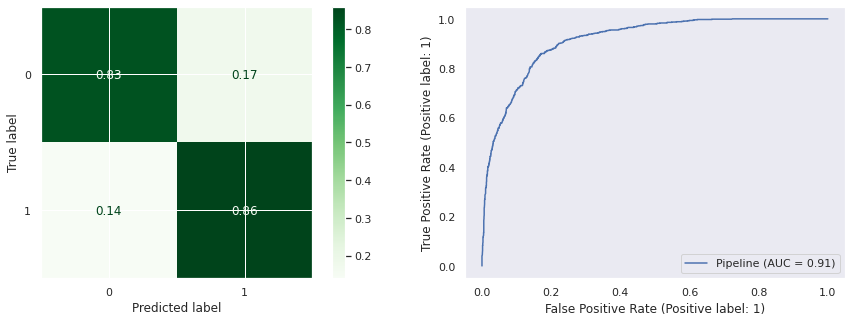

CPU times: user 1.4 s, sys: 22.2 ms, total: 1.42 s
Wall time: 1.53 s


In [258]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe_over = make_pipeline(preprocessor, over_sampler, xgb)
xgb_pipe_over.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe_over, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1723
           1       0.73      0.72      0.73       777

    accuracy                           0.83      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.83      0.83      0.83      2500



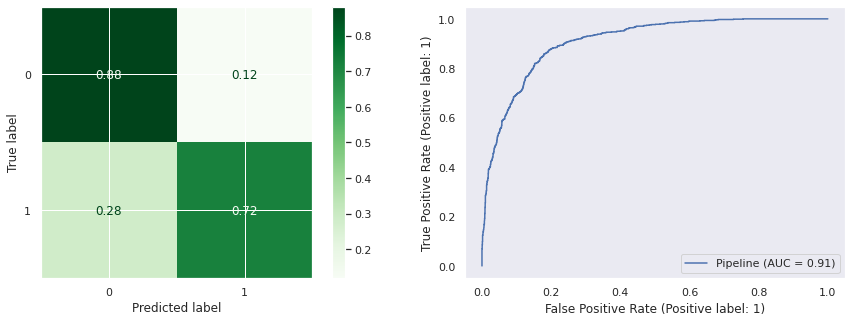

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5144
           1       0.81      0.83      0.82      2356

    accuracy                           0.89      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.89      0.89      0.89      7500



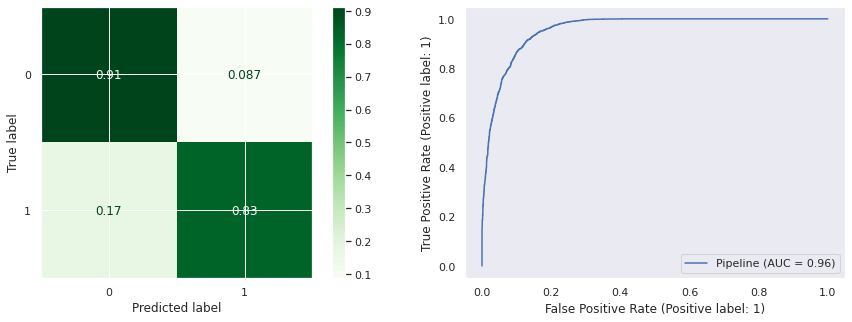

CPU times: user 1.69 s, sys: 26.2 ms, total: 1.72 s
Wall time: 1.93 s


In [238]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor,lgbm)
lgbm_pipe.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe, X_test, y_test, label="Test Data")
evaluate_classiffication(lgbm_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1723
           1       0.71      0.79      0.75       777

    accuracy                           0.83      2500
   macro avg       0.81      0.82      0.81      2500
weighted avg       0.84      0.83      0.84      2500



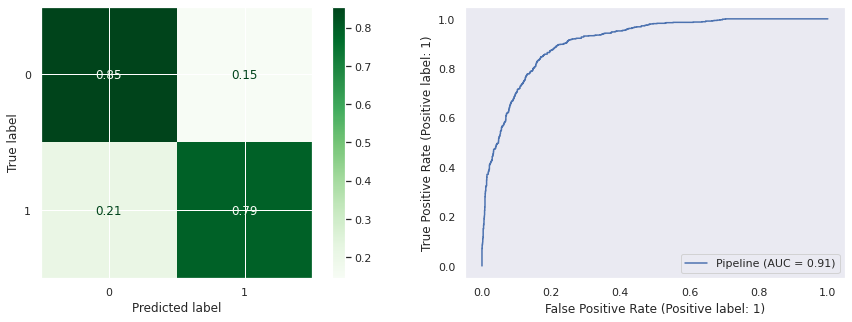

CPU times: user 1.51 s, sys: 94.6 ms, total: 1.61 s
Wall time: 1.67 s


In [239]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor,smote, lgbm)
lgbm_pipe.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1723
           1       0.67      0.86      0.75       777

    accuracy                           0.82      2500
   macro avg       0.80      0.83      0.81      2500
weighted avg       0.85      0.82      0.83      2500



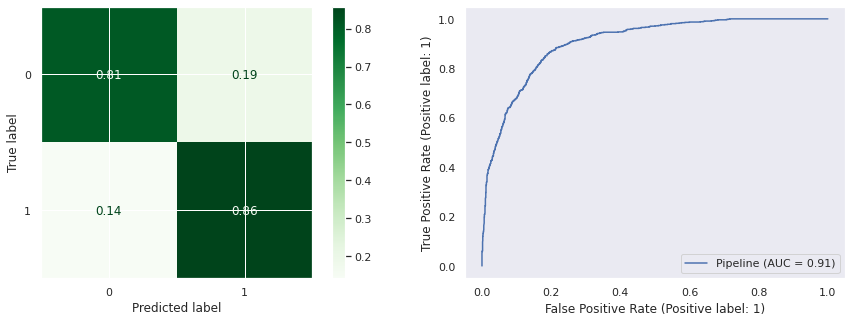

CPU times: user 764 ms, sys: 9.88 ms, total: 774 ms
Wall time: 796 ms


In [259]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe_over = make_pipeline(preprocessor,over_sampler, lgbm)
lgbm_pipe_over.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe_over, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1723
           1       0.76      0.73      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



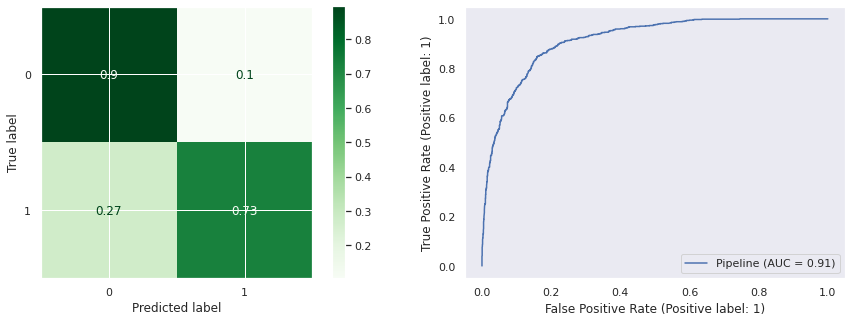

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5144
           1       0.77      0.76      0.77      2356

    accuracy                           0.85      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.85      0.85      0.85      7500



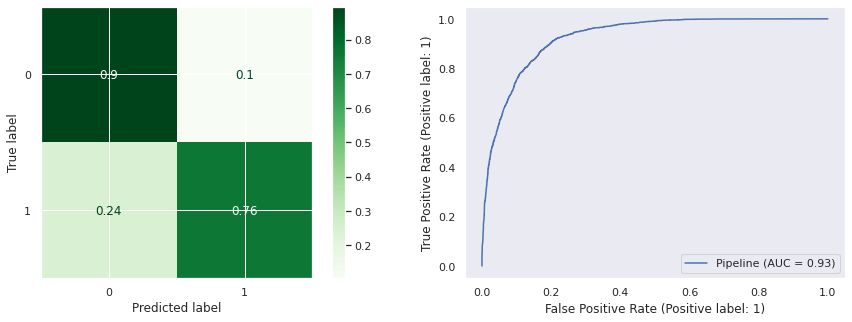

CPU times: user 2.93 s, sys: 20.5 ms, total: 2.95 s
Wall time: 5 s


In [245]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe, X_test, y_test, label="Test Data")
evaluate_classiffication(gbc_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1723
           1       0.76      0.73      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



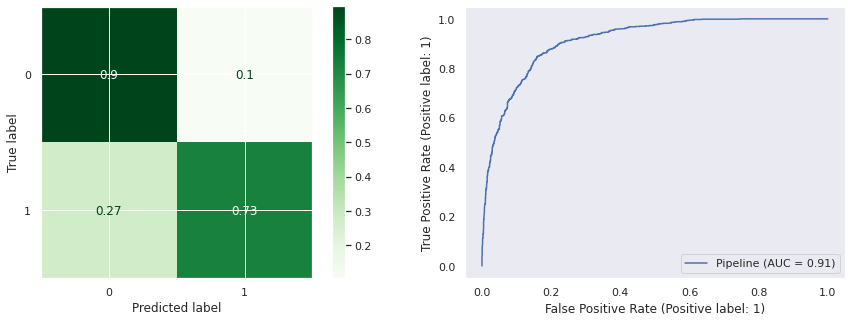

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5144
           1       0.77      0.76      0.77      2356

    accuracy                           0.85      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.85      0.85      0.85      7500



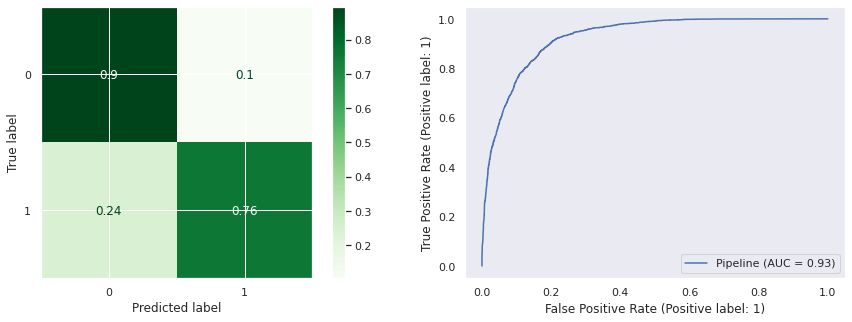

CPU times: user 2.56 s, sys: 16.4 ms, total: 2.57 s
Wall time: 3.12 s


In [246]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe, X_test, y_test, label="Test Data")
evaluate_classiffication(gbc_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1723
           1       0.68      0.86      0.76       777

    accuracy                           0.83      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.83      0.84      2500



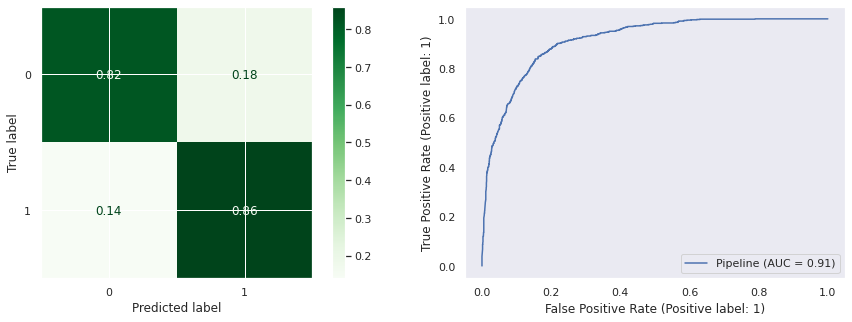

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      5144
           1       0.69      0.89      0.77      2356

    accuracy                           0.84      7500
   macro avg       0.81      0.85      0.82      7500
weighted avg       0.86      0.84      0.84      7500



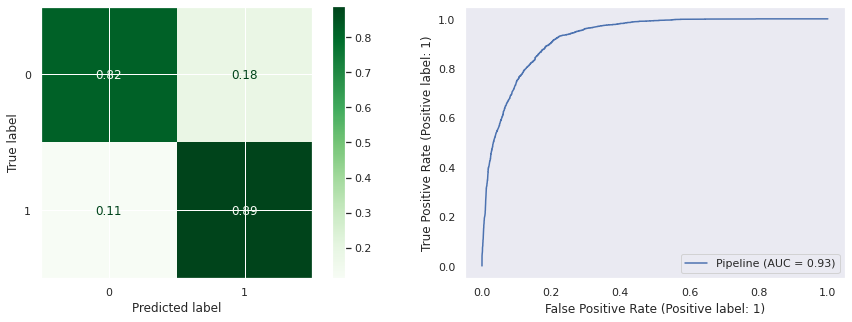

CPU times: user 2.47 s, sys: 25.5 ms, total: 2.5 s
Wall time: 2.63 s


In [262]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe_over = make_pipeline(preprocessor, over_sampler,gbc)
gbc_pipe_over.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe_over, X_test, y_test, label="Test Data")
evaluate_classiffication(gbc_pipe_over, X_train, y_train, label="Train Data")

In [ ]:
gbc_pipe.get_params()

In [264]:
#create and visualize our parameter grid
param_grid = {'gradientboostingclassifier__max_depth': [1,3,5,7,9,10],
              'gradientboostingclassifier__min_samples_split': [1,2,3],
              'gradientboostingclassifier__n_estimators': [80,100,120]
              }


In [265]:
model = gbc_pipe 
gbc_pipe_grid_search = GridSearchCV(model, param_grid)  

In [266]:
%%time
# Instantiate and fit gradient boosting classifier
gbc_pipe_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_

CPU times: user 5min 51s, sys: 536 ms, total: 5min 51s
Wall time: 5min 52s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f315043d8d0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f31558e1f50>)])),
                                       ('randomoversampler',
                                        RandomOverSampler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__max_depth': [1, 3, 5, 7,
                                                                   9, 10],
                         'gradientboostingclassifier__min_samples_split': [1, 2,
                                                                           3],
                         'gradientboostingclassifier__n_estimators': [80, 100,
                                                                      120]})

In [267]:
#retrieve the best version of the model
best_model_gbc = gbc_pipe_grid_search.best_estimator_

#refit the model on the whole training set
best_model_gbc.fit(X_train, y_train)

#score the model on the test set
best_model_gbc.score(X_test, y_test)

best_model_gbc.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f3150c03790>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1723
           1       0.68      0.85      0.76       777

    accuracy                           0.83      2500
   macro avg       0.80      0.84      0.81      2500
weighted avg       0.85      0.83      0.84      2500



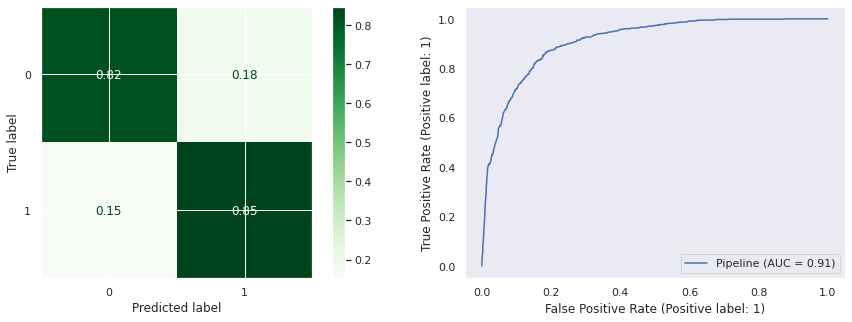

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5144
           1       0.68      0.87      0.76      2356

    accuracy                           0.83      7500
   macro avg       0.81      0.84      0.82      7500
weighted avg       0.85      0.83      0.84      7500



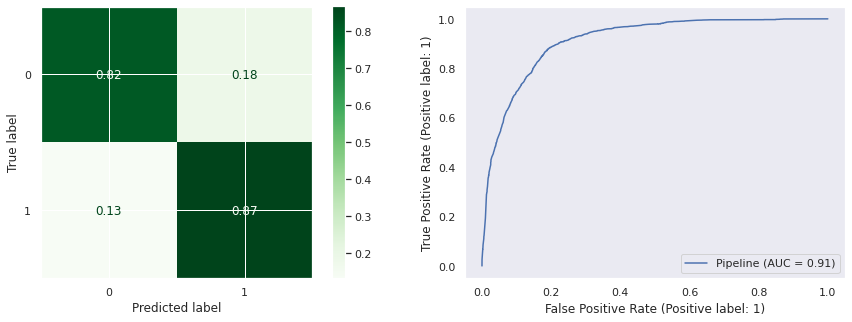

In [269]:
evaluate_classiffication(best_model_gbc, X_test, y_test, label="Test Data")
evaluate_classiffication(best_model_gbc, X_train, y_train, label="Train Data")

Best Log Reg Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1723
           1       0.68      0.87      0.76       777

    accuracy                           0.83      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.83      0.84      2500



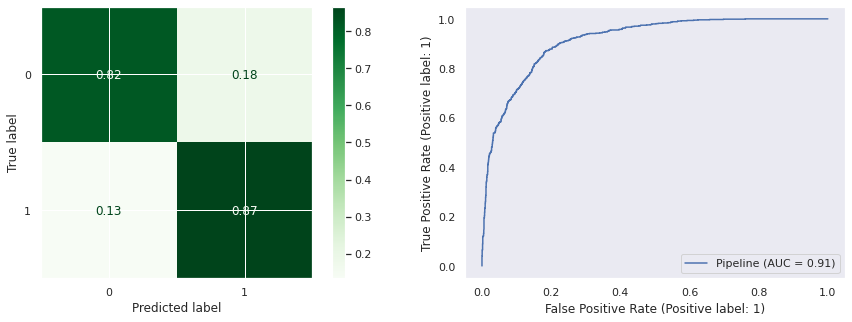

Best Random Forest Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1723
           1       0.69      0.85      0.76       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



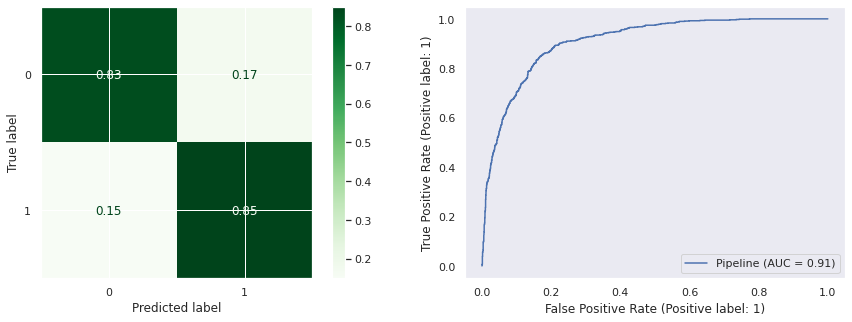

Best KNN Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1723
           1       0.63      0.81      0.71       777

    accuracy                           0.80      2500
   macro avg       0.77      0.80      0.78      2500
weighted avg       0.82      0.80      0.80      2500



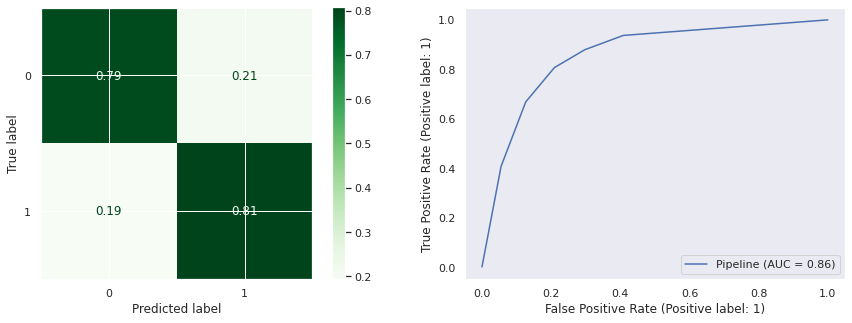

In [257]:
print("Best Log Reg Tuned")
evaluate_classiffication(log_reg_best_pipe, X_test, y_test, label="Test Data")
print("Best Random Forest Tuned")
evaluate_classiffication(best_model_rf, X_test, y_test, label="Test Data")
print("Best KNN Tuned")
evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")


------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1723
           1       0.69      0.86      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.86      0.84      0.84      2500



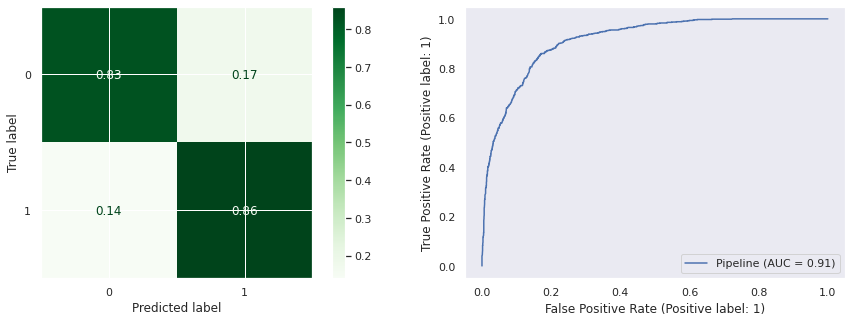

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1723
           1       0.67      0.86      0.75       777

    accuracy                           0.82      2500
   macro avg       0.80      0.83      0.81      2500
weighted avg       0.85      0.82      0.83      2500



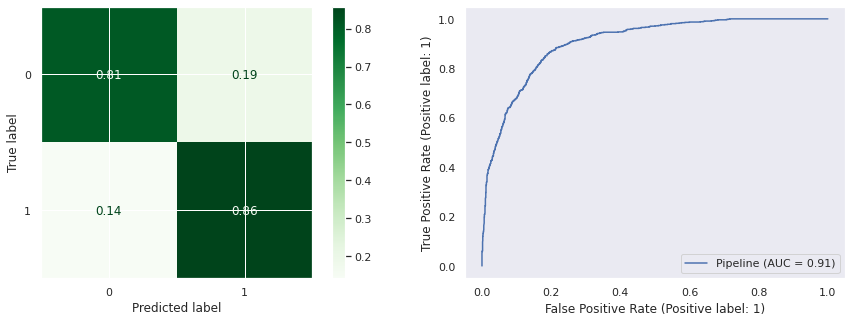

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      5144
           1       0.69      0.89      0.77      2356

    accuracy                           0.84      7500
   macro avg       0.81      0.85      0.82      7500
weighted avg       0.86      0.84      0.84      7500



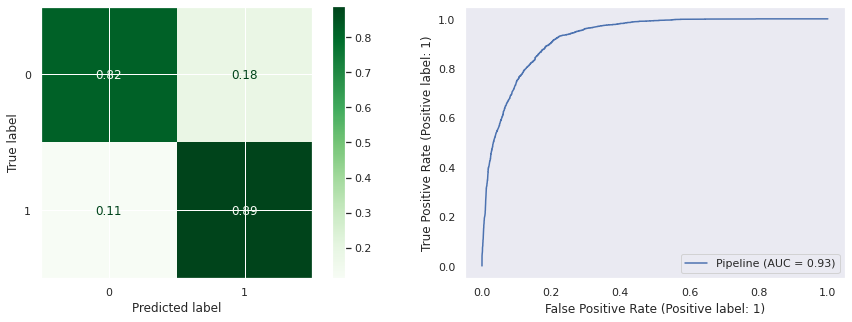

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1723
           1       0.68      0.85      0.76       777

    accuracy                           0.83      2500
   macro avg       0.80      0.84      0.81      2500
weighted avg       0.85      0.83      0.84      2500



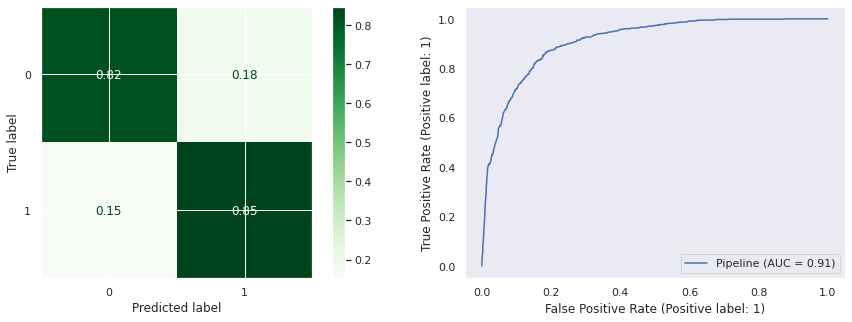

In [272]:
evaluate_classiffication(xgb_pipe_over, X_test, y_test, label="Test Data")
evaluate_classiffication(lgbm_pipe_over, X_test, y_test, label="Test Data")
evaluate_classiffication(gbc_pipe_over, X_train, y_train, label="Train Data")
evaluate_classiffication(best_model_gbc, X_test, y_test, label="Test Data")
